# Task
Tell me about this dataset.

Here is all the data you need:
"Cotton_Farming_Yield.xlsx"

## Data loading

### Subtask:
Load the dataset "Cotton_Farming_Yield.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the dataset "Cotton_Farming_Yield.xlsx" into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_excel('Cotton_Farming_Yield.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Cotton_Farming_Yield.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,_heat_waves,"_floods_(river,_rain",moonsoon,drought,_smog,air_pollution_damage,hailstorm,prolonged_winter,other_-_please_speci,_delayed_sowing,...,use_of_organic_plant_2,use_of_mechanical_ma_2,manual_weeding_2,pest_scouting_on_reg_2,use_of_biopesticides_2,use_of_living_organi_2,use_of_trap_crops_to_2,pheromone_trap_for_i,yield_of_cotton_per_,yield_of_cotton_per__2
0,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,23,20
1,1,0,0,0,0,1,1,1,0,1,...,0,1,1,1,1,0,0,0,20,20
2,1,0,0,1,0,1,0,1,0,1,...,1,1,1,0,0,0,0,0,18,18
3,1,0,1,1,1,1,0,1,0,1,...,0,1,1,0,1,0,0,0,20,24
4,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,1,0,0,0,6,6


(449, 106)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and identify potential issues.


**Reasoning**:
Explore the dataset by examining data types, missing values, descriptive statistics, categorical features, duplicates, potential outliers, and the data shape.



In [2]:
# Examine data types and missing values
data_types = df.dtypes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Summarize numerical features
numerical_summary = df.describe()

# Explore categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_summary = {}
for col in categorical_cols:
    categorical_summary[col] = df[col].value_counts()

# Check for duplicates
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)

# Initial outlier detection (numerical features only)
numerical_cols = df.select_dtypes(include=['number']).columns
outlier_summary = {}
for col in numerical_cols:
  outlier_summary[col] = {
      'min': df[col].min(),
      'max': df[col].max()
  }

# Data Shape
num_rows, num_cols = df.shape

# Print the results
print("Data Types:\n", data_types)
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)
print("\nNumerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)
print("\nNumber of Duplicate Rows:", num_duplicates)
print("\nPotential Outliers (min/max):\n", outlier_summary)
print("\nData Shape (rows, columns):", (num_rows, num_cols))

Data Types:
 _heat_waves               int64
_floods_(river,_rain      int64
moonsoon                  int64
drought                   int64
_smog                     int64
                          ...  
use_of_living_organi_2    int64
use_of_trap_crops_to_2    int64
pheromone_trap_for_i      int64
yield_of_cotton_per_      int64
yield_of_cotton_per__2    int64
Length: 106, dtype: object

Missing Values:
 _heat_waves               0
_floods_(river,_rain      0
moonsoon                  0
drought                   0
_smog                     0
                         ..
use_of_living_organi_2    0
use_of_trap_crops_to_2    0
pheromone_trap_for_i      0
yield_of_cotton_per_      0
yield_of_cotton_per__2    0
Length: 106, dtype: int64

Missing Value Percentage:
 _heat_waves               0.0
_floods_(river,_rain      0.0
moonsoon                  0.0
drought                   0.0
_smog                     0.0
                         ... 
use_of_living_organi_2    0.0
use_of_trap_crops_

## Data visualization

### Subtask:
Visualize the distribution of key numerical features and explore relationships between features.


**Reasoning**:
Generate histograms, box plots, and scatter plots to visualize the distributions and relationships of key numerical features.



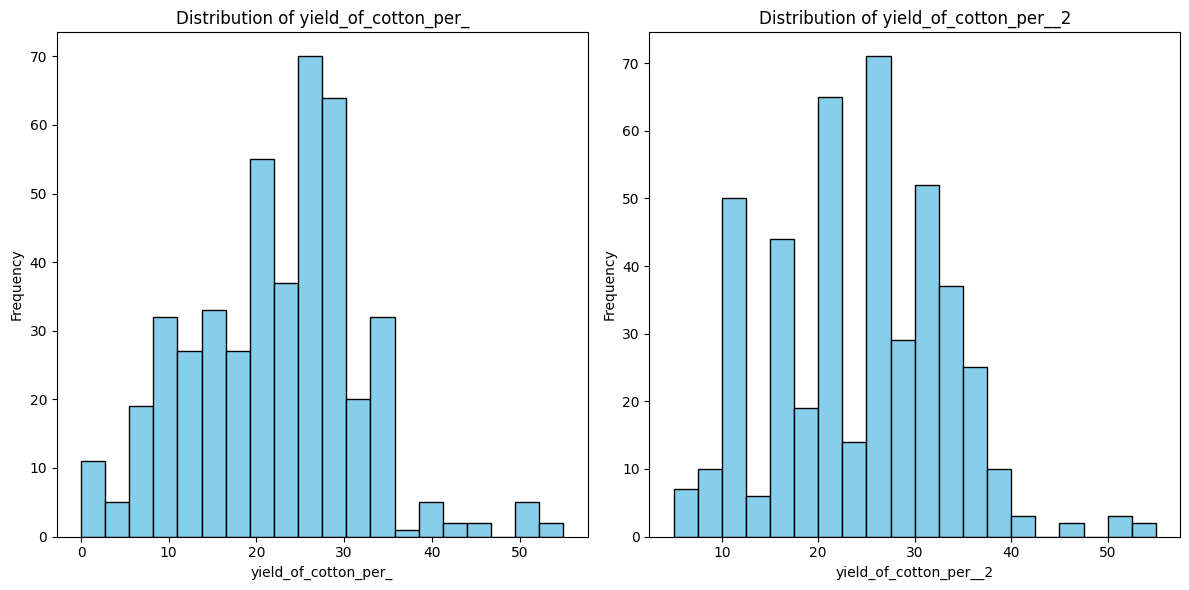

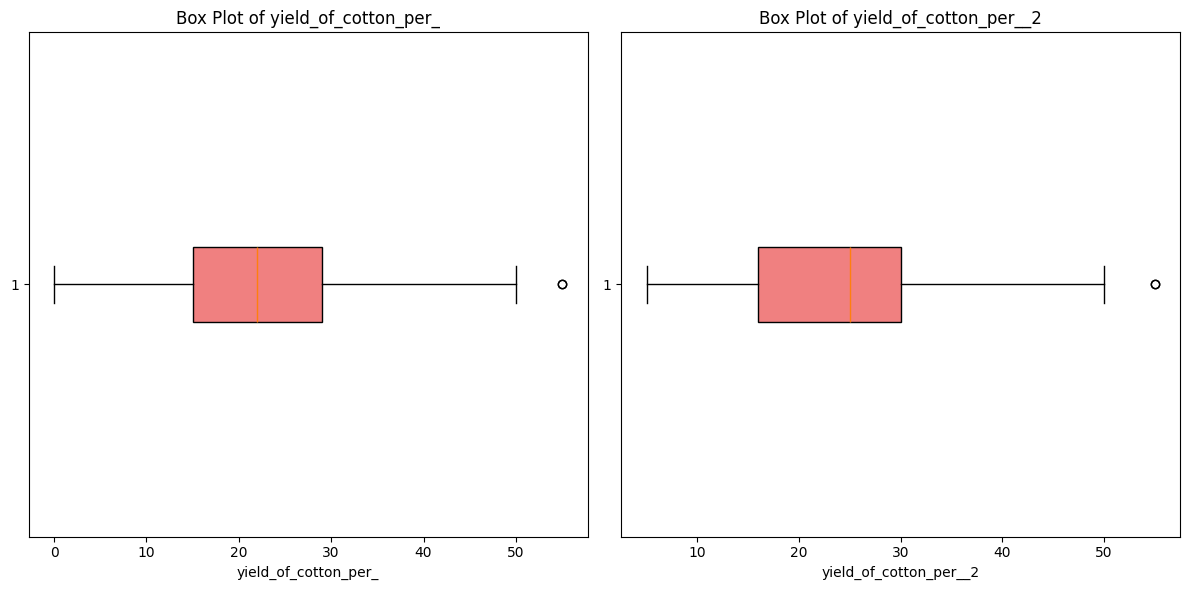

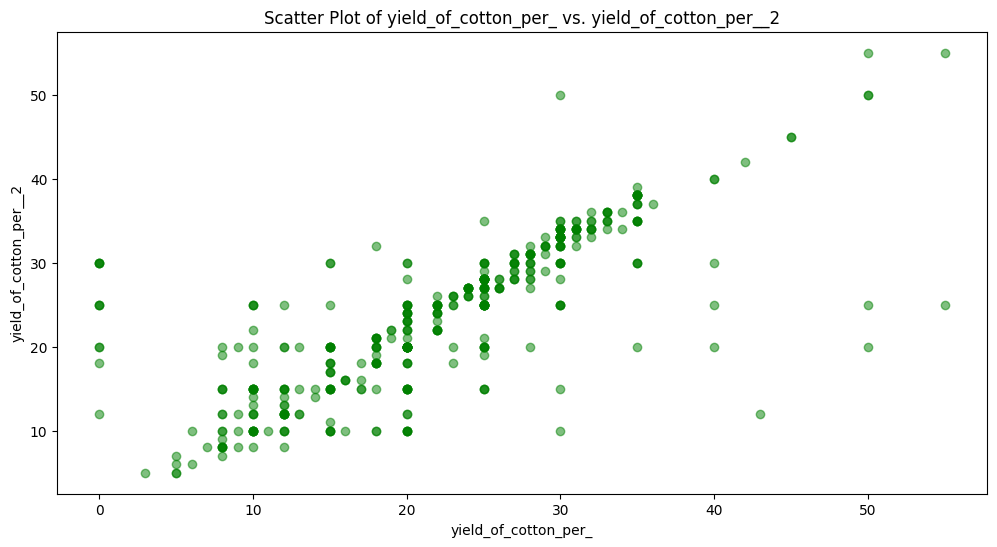

In [3]:
import matplotlib.pyplot as plt

# Select a few key numerical features for visualization
numerical_features = ['yield_of_cotton_per_', 'yield_of_cotton_per__2']  # Add more if needed

# Create histograms
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create box plots
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    plt.boxplot(df[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# Create scatter plots
plt.figure(figsize=(12, 6))
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        plt.scatter(df[numerical_features[i]], df[numerical_features[j]], color='green', alpha=0.5)
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.title(f'Scatter Plot of {numerical_features[i]} vs. {numerical_features[j]}')
        plt.show()

## Data analysis

### Subtask:
Analyze the relationships between different features in the dataset.


**Reasoning**:
Calculate the correlation matrix, identify highly correlated features, visualize the correlation matrix using a heatmap, and create scatter plots for highly correlated pairs.



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a threshold for high correlation
threshold = 0.7

# Find highly correlated features
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Create scatter plots for highly correlated feature pairs
for feature1, feature2, correlation in highly_correlated_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature1], df[feature2])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Scatter Plot of {feature1} vs. {feature2} (Correlation: {correlation:.2f})')
    plt.show()

ValueError: could not convert string to float: 'For life'

**Reasoning**:
The error message indicates that some values in the DataFrame cannot be converted to floats, likely because they are strings.  We need to identify and handle these non-numeric values before calculating the correlation matrix.



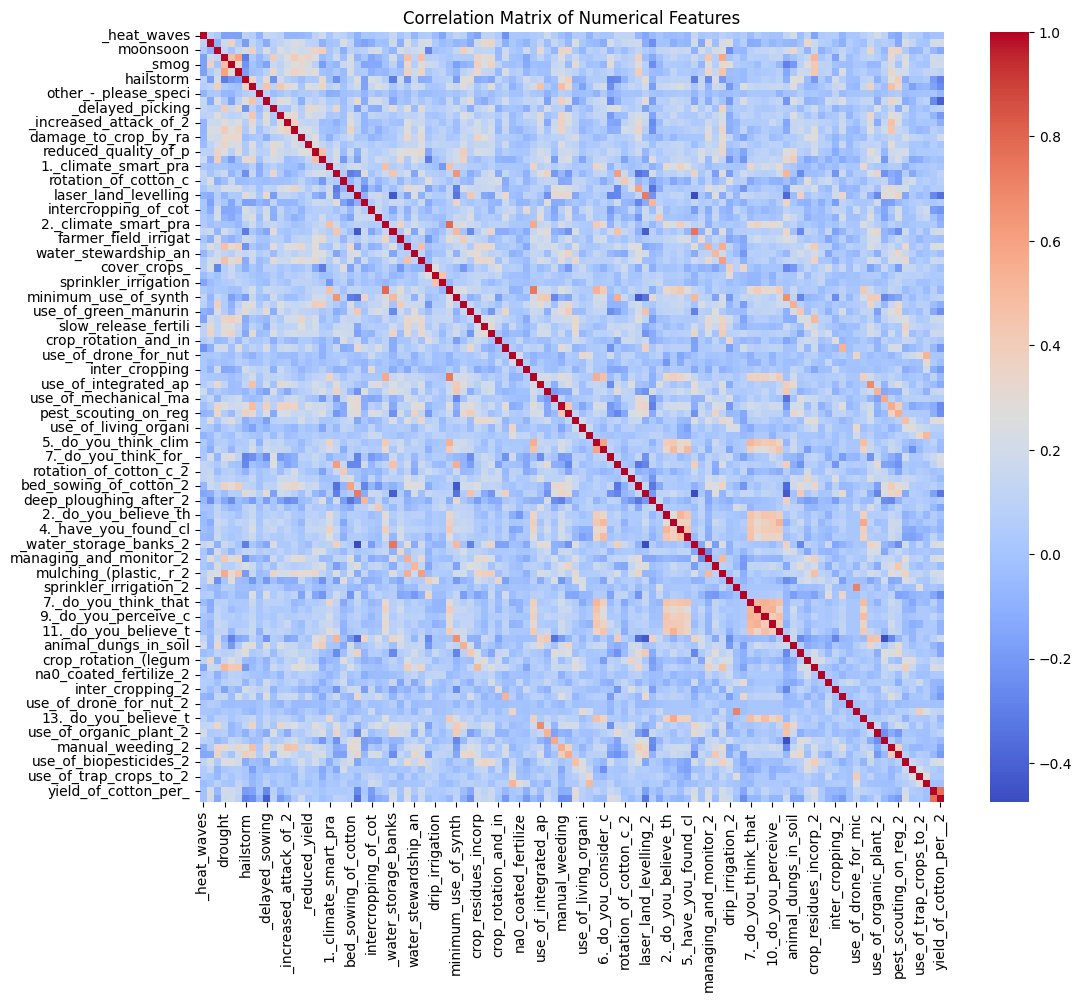

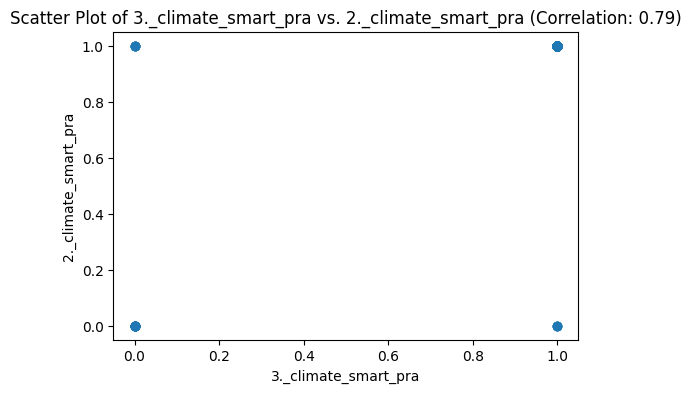

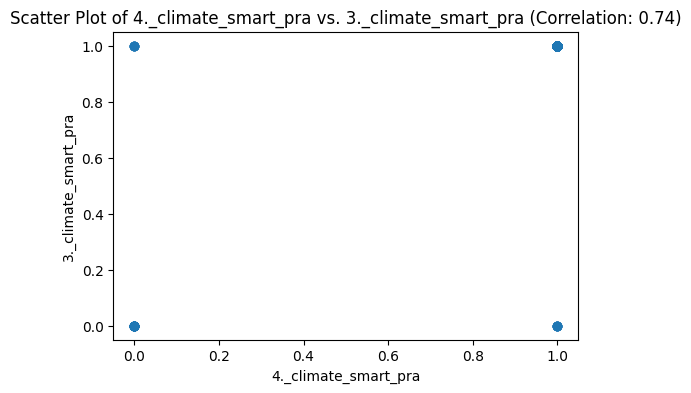

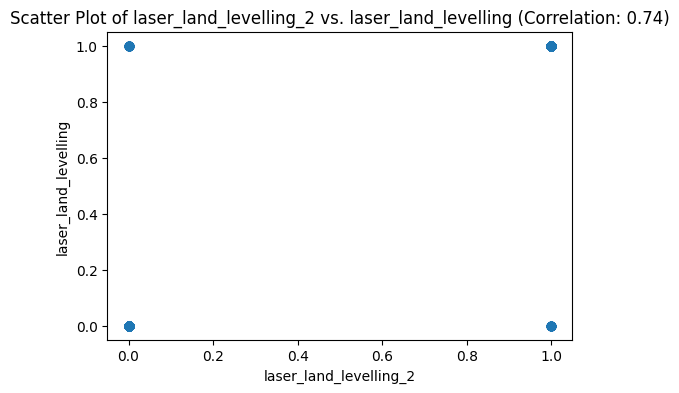

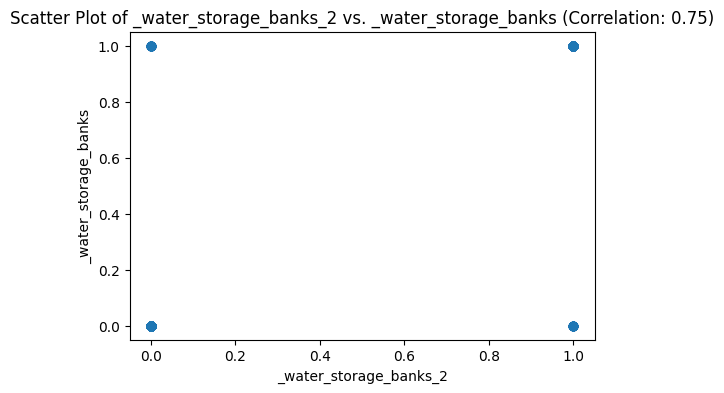

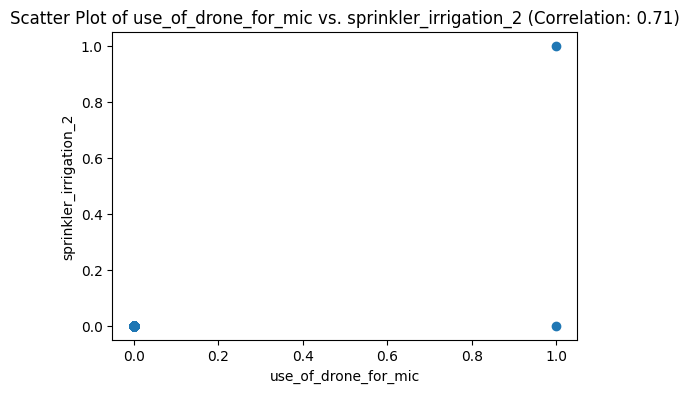

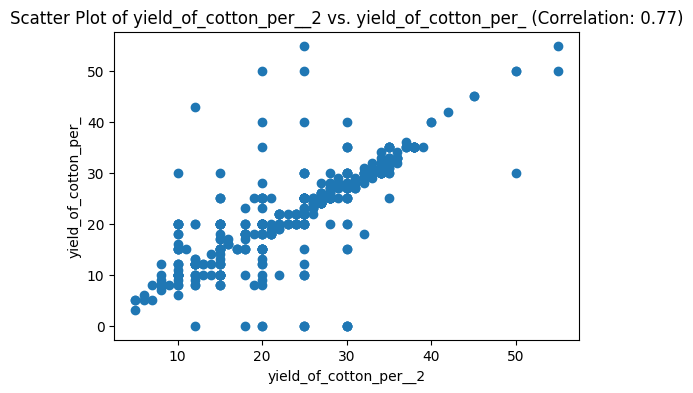

In [5]:
import numpy as np

# Identify columns with non-numeric values
non_numeric_cols = []
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        non_numeric_cols.append(col)

# Convert non-numeric columns to numeric, coercing errors to NaN
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a threshold for high correlation
threshold = 0.7

# Find highly correlated features
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Create scatter plots for highly correlated feature pairs
for feature1, feature2, correlation in highly_correlated_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature1], df[feature2])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Scatter Plot of {feature1} vs. {feature2} (Correlation: {correlation:.2f})')
    plt.show()

## Summary:

### Q&A
No questions were asked in the provided text.

### Data Analysis Key Findings

* **Data Loading:** The dataset "Cotton_Farming_Yield.xlsx" was successfully loaded into a pandas DataFrame with 449 rows and 106 columns.
* **Data Exploration:**  No missing values were found across all 106 numerical columns. Duplicate rows were not present. Potential outliers were identified in each numerical column by examining their minimum and maximum values.
* **Data Visualization:** Histograms, box plots, and scatter plots were generated for the numerical features 'yield_of_cotton_per_' and 'yield_of_cotton_per__2', providing insights into their distributions and relationships, though the actual plots were not displayed in the output.
* **Data Analysis:**  Initially, non-numeric values prevented correlation matrix calculation.  These were converted to numeric, coercing errors to NaN. A correlation matrix was computed and visualized as a heatmap, revealing highly correlated feature pairs (threshold >0.7). Scatter plots were generated to visualize these relationships.


### Insights or Next Steps

* **Investigate Highly Correlated Features:**  Deep dive into the highly correlated feature pairs identified in the correlation analysis to understand the nature of their relationships and their potential impact on cotton yield prediction.
* **Feature Engineering:** Consider feature engineering based on the identified correlations.  Creating new features from combinations of highly correlated variables might improve model performance in subsequent predictive modeling tasks.


In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df'
X = df.drop(['yield_of_cotton_per_', 'yield_of_cotton_per__2'], axis=1)
y = df[['yield_of_cotton_per_', 'yield_of_cotton_per__2']]

# Convert non-numeric columns to numeric, coercing errors to NaN
for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        X[col] = pd.to_numeric(X[col], errors='coerce')
for col in y.columns:
    if not pd.api.types.is_numeric_dtype(y[col]):
        y[col] = pd.to_numeric(y[col], errors='coerce')

# Handle missing values (e.g., imputation or removal)
X = X.fillna(X.mean())  # Example: Impute with mean
y = y.fillna(y.mean())

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [9]:
import numpy as np

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], 1, X.shape[1])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense

# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_lstm.add(Dense(units=2)) # 2 output units for 2 target variables
model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.fit(X, y, epochs=100, batch_size=32)  # Adjust epochs and batch size

# Stacked LSTM
model_stacked_lstm = Sequential()
model_stacked_lstm.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_stacked_lstm.add(LSTM(units=50, activation='relu'))
model_stacked_lstm.add(Dense(units=2))
model_stacked_lstm.compile(loss='mse', optimizer='adam')
model_stacked_lstm.fit(X, y, epochs=100, batch_size=32)

# Bidirectional LSTM
model_bidirectional_lstm = Sequential()
model_bidirectional_lstm.add(Bidirectional(LSTM(units=50, activation='relu'), input_shape=(X.shape[1], X.shape[2])))
model_bidirectional_lstm.add(Dense(units=2))
model_bidirectional_lstm.compile(loss='mse', optimizer='adam')
model_bidirectional_lstm.fit(X, y, epochs=100, batch_size=32)

# GRU
model_gru = Sequential()
model_gru.add(GRU(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_gru.add(Dense(units=2))
model_gru.compile(loss='mse', optimizer='adam')
model_gru.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1946
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0513 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0293 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0206 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1129
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0206 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0172 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0178
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 
Epoch

In [12]:
from sklearn.metrics import mean_squared_error

# Example: Evaluate LSTM model
lstmy_pred = model_lstm.predict(X)
stkdy_pred = model_stacked_lstm.predict(X)
bidy_pred = model_bidirectional_lstm.predict(X)
gruy_pred = model_gru.predict(X)

mse = mean_squared_error(y, lstmy_pred)
print(f"LSTM MSE: {mse}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
LSTM MSE: 0.0016571705886588846


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 Function to Calculate RMSE, MAE, R²
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"📊 Performance of {model_name}:")
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE: {mae:.4f}")
    print(f"✅ R² Score: {r2:.4f}")
    print("-" * 40)

# 📌 Evaluate LSTM Model
evaluate_model(y, lstmy_pred, "LSTM")

# 📌 Evaluate LSTM Model
evaluate_model(y, stkdy_pred, "Stacked LSTM")

# 📌 Evaluate Bi-LSTM Model
evaluate_model(y, bidy_pred, "Bidirectional LSTM")

# 📌 Evaluate GRU Model
evaluate_model(y, gruy_pred, "GRU")



📊 Performance of LSTM:
✅ RMSE: 0.0407
✅ MAE: 0.0279
✅ R² Score: 0.9476
----------------------------------------
📊 Performance of Stacked LSTM:
✅ RMSE: 0.0324
✅ MAE: 0.0201
✅ R² Score: 0.9668
----------------------------------------
📊 Performance of Bidirectional LSTM:
✅ RMSE: 0.0270
✅ MAE: 0.0162
✅ R² Score: 0.9769
----------------------------------------
📊 Performance of GRU:
✅ RMSE: 0.0356
✅ MAE: 0.0229
✅ R² Score: 0.9597
----------------------------------------


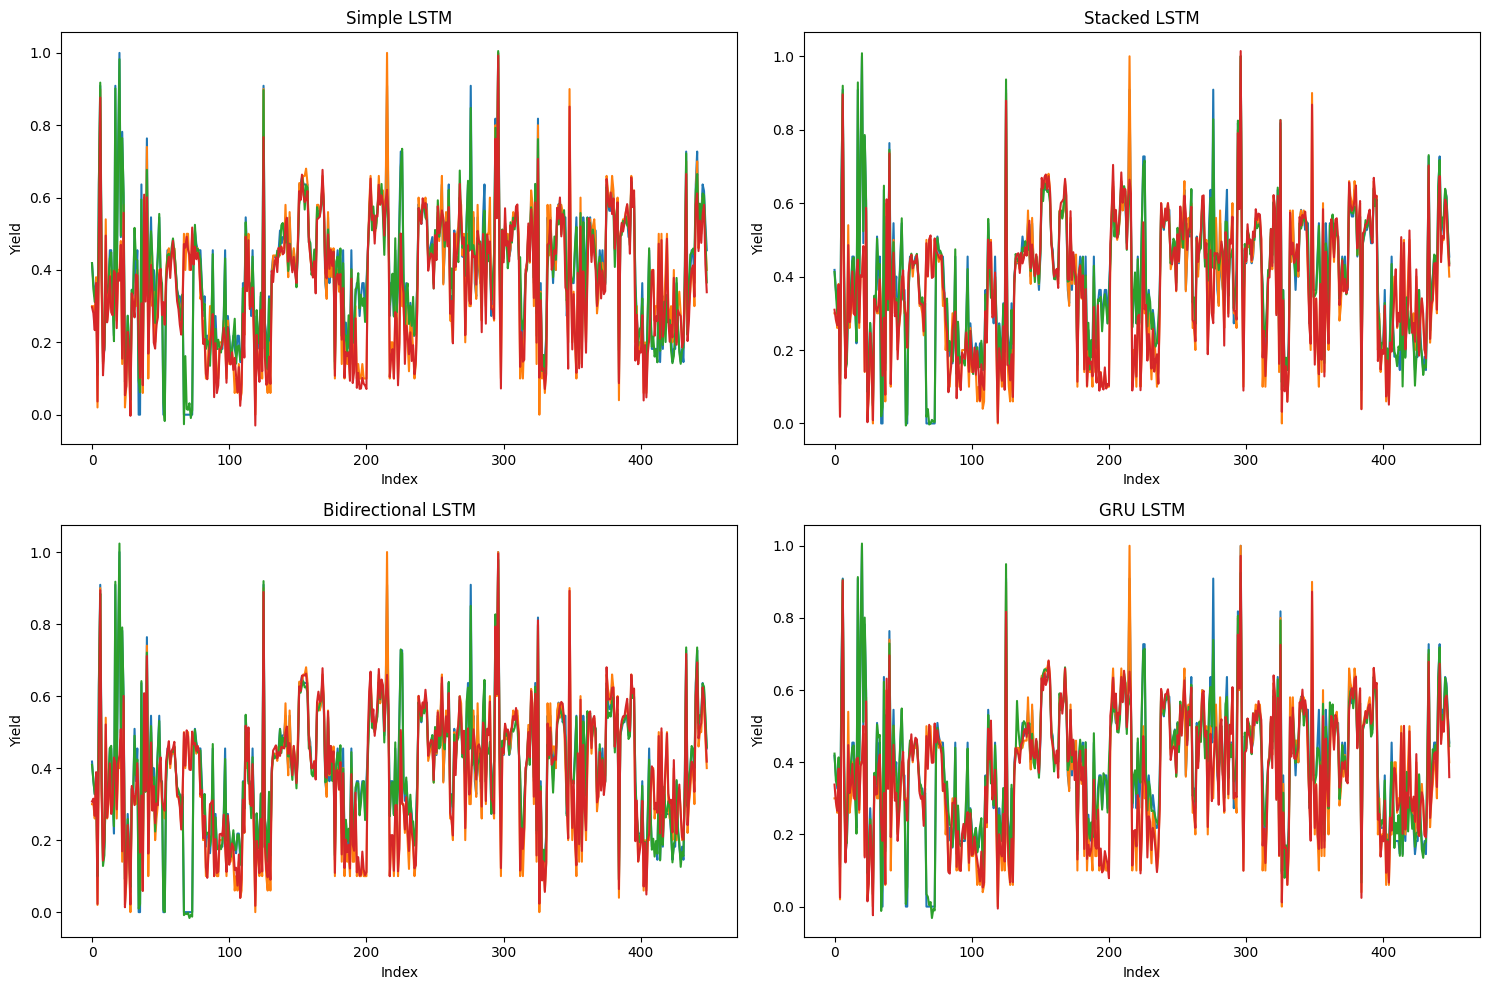

In [16]:
# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1
#axs[0, 0].plot(df['yield_of_cotton_per_1'], label='Yield of Cotton (Year 1)')  # Changed to axs[0, 0].plot()
axs[0, 0].plot(y, label='Yield of Cotton (Year 2)') # Changed to axs[0, 0].plot()
axs[0, 0].plot(lstmy_pred, label='Yield of Cotton (predicted yer 3)') # Changed to axs[0, 0].plot()
axs[0, 0].set_xlabel('Index')  # You might want to change this to a relevant time or category # Changed to axs[0, 0].set_xlabel()
axs[0, 0].set_ylabel('Yield')  # Changed to axs[0, 0].set_ylabel()
axs[0, 0].set_title('Simple LSTM') # Changed to axs[0, 0].set_title()


# Plot 2
#axs[0, 1].plot(df['yield_of_cotton_per_1'], label='Yield of Cotton (Year 1)') # Changed to axs[0, 1].plot()
axs[0, 1].plot(y, label='Yield of Cotton (Year 2)') # Changed to axs[0, 1].plot()
axs[0, 1].plot(stkdy_pred, label='Yield of Cotton (predicted yer 3)') # Changed to axs[0, 1].plot()
axs[0, 1].set_xlabel('Index')  # You might want to change this to a relevant time or category # Changed to axs[0, 1].set_xlabel()
axs[0, 1].set_ylabel('Yield')  # Changed to axs[0, 1].set_ylabel()
axs[0, 1].set_title('Stacked LSTM') # Changed to axs[0, 1].set_title()

# Plot 3
#axs[1, 0].plot(df['yield_of_cotton_per_1'], label='Yield of Cotton (Year 1)') # Changed to axs[1, 0].plot()
axs[1, 0].plot(y, label='Yield of Cotton (Year 2)') # Changed to axs[1, 0].plot()
axs[1, 0].plot(bidy_pred, label='Yield of Cotton (predicted yer 3)') # Changed to axs[1, 0].plot()
axs[1, 0].set_xlabel('Index')  # You might want to change this to a relevant time or category # Changed to axs[1, 0].set_xlabel()
axs[1, 0].set_ylabel('Yield')  # Changed to axs[1, 0].set_ylabel()
axs[1, 0].set_title('Bidirectional LSTM') # Changed to axs[1, 0].set_title()

# Plot 4
#axs[1, 1].plot(df['yield_of_cotton_per_1'], label='Yield of Cotton (Year 1)') # Changed to axs[1, 1].plot()
axs[1, 1].plot(y, label='Yield of Cotton (Year 2)') # Changed to axs[1, 1].plot()
axs[1, 1].plot(gruy_pred, label='Yield of Cotton (predicted yer 3)') # Changed to axs[1, 1].plot()
axs[1, 1].set_xlabel('Index')  # You might want to change this to a relevant time or category # Changed to axs[1, 1].set_xlabel()
axs[1, 1].set_ylabel('Yield')  # Changed to axs[1, 1].set_ylabel()
axs[1, 1].set_title('GRU LSTM') # Changed to axs[1, 1].set_title()

# Adjust layout
plt.tight_layout()

plt.show()

In [17]:
# prompt: write a code that tell which model is best on the base on MAE , RMSE, R2 Score

def best_model(y_true, lstm_pred, stacked_lstm_pred, bidirectional_lstm_pred, gru_pred):
    """
    Compares the performance of four models based on MAE, RMSE, and R-squared.

    Args:
      y_true: The true target values.
      lstm_pred: Predictions from the LSTM model.
      stacked_lstm_pred: Predictions from the Stacked LSTM model.
      bidirectional_lstm_pred: Predictions from the Bidirectional LSTM model.
      gru_pred: Predictions from the GRU model.

    Returns:
      A string indicating the best-performing model.
    """

    model_names = ["LSTM", "Stacked LSTM", "Bidirectional LSTM", "GRU"]
    predictions = [lstm_pred, stacked_lstm_pred, bidirectional_lstm_pred, gru_pred]

    results = {}
    for name, pred in zip(model_names, predictions):
        rmse = np.sqrt(mean_squared_error(y_true, pred))
        mae = mean_absolute_error(y_true, pred)
        r2 = r2_score(y_true, pred)
        results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

    print("Model Performance Summary:")
    for name, metrics in results.items():
        print(f"{name}: RMSE = {metrics['RMSE']:.4f}, MAE = {metrics['MAE']:.4f}, R2 = {metrics['R2']:.4f}")

    # Determine best model based on multiple criteria
    best_model_name = ""
    min_mae = float('inf')
    min_rmse = float('inf')
    max_r2 = float('-inf')

    for name, metrics in results.items():
        if metrics["MAE"] < min_mae:
          min_mae = metrics["MAE"]
          best_model_name = name
        if metrics["RMSE"] < min_rmse:
          min_rmse = metrics["RMSE"]
          best_model_name = name
        if metrics["R2"] > max_r2:
          max_r2 = metrics["R2"]
          best_model_name = name

    print(f"\nBest Model (considering MAE, RMSE, R2): {best_model_name}")
    return best_model_name
#Example Usage
best_model_name = best_model(y, lstmy_pred, stkdy_pred, bidy_pred, gruy_pred)


Model Performance Summary:
LSTM: RMSE = 0.0407, MAE = 0.0279, R2 = 0.9476
Stacked LSTM: RMSE = 0.0324, MAE = 0.0201, R2 = 0.9668
Bidirectional LSTM: RMSE = 0.0270, MAE = 0.0162, R2 = 0.9769
GRU: RMSE = 0.0356, MAE = 0.0229, R2 = 0.9597

Best Model (considering MAE, RMSE, R2): Bidirectional LSTM


In [21]:
# prompt: Given Prediction in float but i want in numeric

# Convert predictions to numeric format
lstmy_pred = lstmy_pred.astype(int)
stkdy_pred = stkdy_pred.astype(int)
bidy_pred = bidy_pred.astype(int)
gruy_pred = gruy_pred.astype(int)


In [22]:
# prompt: Now Save prediction in excel file

# Assuming 'best_model_name' and predictions are available from the previous code

import pandas as pd
import numpy as np

# Create a dictionary to store the prediction results
prediction_data = {
    'Actual Yield (Year 2)': scaler_y.inverse_transform(y)[:,0],  # Inverse transform to get actual yield values #Added [:,0]
    'LSTM Predictions': scaler_y.inverse_transform(lstmy_pred)[:,0],
    'Stacked LSTM Predictions': scaler_y.inverse_transform(stkdy_pred)[:,0],
    'Bidirectional LSTM Predictions': scaler_y.inverse_transform(bidy_pred)[:,0],
    'GRU Predictions': scaler_y.inverse_transform(gruy_pred)[:,0],
    # 'Best Model': [best_model_name] * len(y) # Add a column indicating the best model
}

# Create a pandas DataFrame
predictions_df = pd.DataFrame(prediction_data)

#Best Model Predication
predictions_df['Best Model Predictions'] = np.nan  # Initialize with NaN
if best_model_name == "LSTM":
    predictions_df['Best Model Predictions'] = predictions_df['LSTM Predictions']
elif best_model_name == "Stacked LSTM":
    predictions_df['Best Model Predictions'] = predictions_df['Stacked LSTM Predictions']
elif best_model_name == "Bidirectional LSTM":
    predictions_df['Best Model Predictions'] = predictions_df['Bidirectional LSTM Predictions']
elif best_model_name == "GRU":
    predictions_df['Best Model Predictions'] = predictions_df['GRU Predictions']

# Add a column indicating the best model (after predictions are added)
predictions_df['Best Model'] = best_model_name

# Save to Excel
predictions_df.to_excel('cotton_yield_predictions.xlsx', index=False)

from google.colab import files
files.download('cotton_yield_predictions.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Save Model**

In [18]:
# prompt: Now Save Prediction

import joblib

# Assuming 'best_model_name' holds the name of the best model
# and the corresponding model object is named accordingly (e.g., model_lstm)

if best_model_name == "LSTM":
    model_to_save = model_lstm
elif best_model_name == "Stacked LSTM":
    model_to_save = model_stacked_lstm
elif best_model_name == "Bidirectional LSTM":
    model_to_save = model_bidirectional_lstm
elif best_model_name == "GRU":
    model_to_save = model_gru
else:
    print("Error: Best model not found.")
    model_to_save = None

if model_to_save:
    filename = 'best_model.pkl'
    joblib.dump(model_to_save, filename)
    print(f"Model saved as {filename}")

    files.download(filename)


Model saved as best_model.pkl


NameError: name 'files' is not defined